In [235]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [236]:
# Colab 폴더로 경로 이동
%cd /content/drive/MyDrive/Colab Notebooks/DeepLearning

/content/drive/MyDrive/Colab Notebooks/DeepLearning


## 모델 저장과 로딩

- 방법1) 모델전체 저장(모델구조 + 가중치 + 변수)
  - save_model()
  - 복원 시 추가 작업 필요없이 모델파일 로딩해서 사용가능

- 방법2) 가중치만 저장
  - save_weights()
  - 복원 시 모델 구조(Architecure)생성 후 가중치 적용

- 방법3) 모델 전체 또는 가중치 자동 저장
  - fit()에서 ModelCheckPoint Event에 대한 callback 등록
  - save_best_only = True: 모니터링 기준에 따라서 좋은 성능의 모델만 저장
  - save_weight_only = True: 가중치만 저장
- 파일 또는 폴더
  - 파일 확장자가 없으면 폴더로 저장
  - 파일 확장자
    - h5 / hdf5 : HDF5 포맷으로 모델 또는 가중치 저장
    - chkf : 체크파일형태 저장 
    - pd : 모델 저장



# [1] 데이터 준비
---

In [237]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import set_random_seed, plot_model
import numpy as np


In [238]:
iris = load_iris()

In [239]:
x_train = iris.data
y_train = iris.target

print(f'x_train.shape: {x_train.shape}, y_train.shape: {y_train.shape}')

x_train.shape: (150, 4), y_train.shape: (150,)


In [240]:
iris.target_names, iris.feature_names

(array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'])

# [2] 데이터 전처리 

In [241]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train)

In [242]:
x_train.shape

(112, 4)

In [243]:
x_train = x_train[:,2:]
x_test = x_test[:,2:]

In [244]:
lecoder = LabelEncoder()
y_train = lecoder.fit_transform(y_train.reshape(-1,1))
y_test = lecoder.fit_transform(y_test.reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [245]:
# y_train = y_train.toarray()

In [246]:
scaler = StandardScaler()
x_train_sc = scaler.fit_transform(x_train)

In [247]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train)

In [248]:
print(f'x_train.shape : {x_train.shape}')
print(f'x_val.shape : {x_val.shape}')
print(f'x_test.shape : {x_test.shape}')


x_train.shape : (84, 2)
x_val.shape : (28, 2)
x_test.shape : (38, 2)


In [249]:
x_train[0],x_test[0]

(array([1.5, 0.2]), array([4.3, 1.3]))

# [3] 모델 구성 및 생성
---
- 입력 데이터: 2개 Feature
- 출력 데이터: 3개 품종
- 학습 방법: 분류 - 다중분류

In [250]:
irisModel = Sequential(name = 'irisModel')
irisModel.add(Dense(9, activation = 'relu', input_shape = (2,)))
irisModel.add(Dense(9, activation = 'softmax'))

In [251]:
irisModel.summary()

Model: "irisModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 9)                 27        
                                                                 
 dense_23 (Dense)            (None, 9)                 90        
                                                                 
Total params: 117
Trainable params: 117
Non-trainable params: 0
_________________________________________________________________


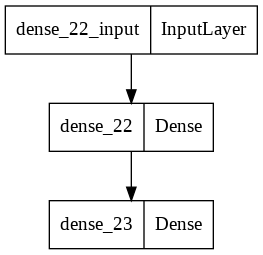

In [252]:
plot_model(irisModel)

In [253]:
irisModel.compile(loss = 'sparse_categorical_crossentropy', optimizer ='adam',metrics = 'accuracy')

In [254]:
his = irisModel.fit(x_train,y_train,
              epochs =1000,
              validation_data=(x_val,y_val))

Epoch 1/1000
3/3 [==============================] - 1s 93ms/step - loss: 3.0093 - accuracy: 0.2619 - val_loss: 2.5970 - val_accuracy: 0.3929
Epoch 2/1000
3/3 [==============================] - 0s 15ms/step - loss: 2.9651 - accuracy: 0.2619 - val_loss: 2.5609 - val_accuracy: 0.3929
Epoch 3/1000
3/3 [==============================] - 0s 14ms/step - loss: 2.9188 - accuracy: 0.2619 - val_loss: 2.5259 - val_accuracy: 0.3929
Epoch 4/1000
3/3 [==============================] - 0s 14ms/step - loss: 2.8758 - accuracy: 0.2619 - val_loss: 2.4915 - val_accuracy: 0.3929
Epoch 5/1000
3/3 [==============================] - 0s 16ms/step - loss: 2.8368 - accuracy: 0.2619 - val_loss: 2.4578 - val_accuracy: 0.3929
Epoch 6/1000
3/3 [==============================] - 0s 14ms/step - loss: 2.7934 - accuracy: 0.2619 - val_loss: 2.4254 - val_accuracy: 0.3929
Epoch 7/1000
3/3 [==============================] - 0s 14ms/step - loss: 2.7545 - accuracy: 0.2619 - val_loss: 2.3938 - val_accuracy: 0.3929
Epoch 8/1000


# [4] 테스트

In [287]:
irisModel.predict(x_val)

array([[9.87062991e-01, 1.25718089e-02, 4.98792433e-05, 4.81368552e-05,
        2.84830967e-05, 1.96448746e-05, 8.76198101e-05, 1.35400724e-05,
        1.17957861e-04],
       [9.99006807e-05, 3.92633885e-01, 6.07248425e-01, 9.58997589e-06,
        2.30897417e-08, 3.20948446e-09, 6.41186080e-06, 8.31111393e-08,
        1.63145523e-06],
       [9.82570827e-01, 1.70538779e-02, 7.21468459e-05, 5.01902105e-05,
        2.43760132e-05, 1.59301744e-05, 8.78299616e-05, 1.20681634e-05,
        1.12769994e-04],
       [8.24707618e-04, 5.42753577e-01, 4.56337363e-01, 4.03424419e-05,
        2.53022961e-07, 4.59975062e-08, 3.24231733e-05, 7.01754573e-07,
        1.06392681e-05],
       [3.75283509e-02, 8.53883147e-01, 1.08218178e-01, 1.45241807e-04,
        3.12379711e-06, 8.23705477e-07, 1.44215330e-04, 4.88927753e-06,
        7.19537566e-05],
       [9.79764581e-01, 1.98510960e-02, 8.67190829e-05, 5.12198676e-05,
        2.25371405e-05, 1.43368625e-05, 8.78844294e-05, 1.13867472e-05,
        1.1

# [5] 평가

In [255]:
lossv, accv = irisModel.evaluate(x_test,y_test)


2/2 [==============================] - 0s 6ms/step - loss: 0.2555 - accuracy: 0.9474


In [256]:
import matplotlib.pyplot as plt

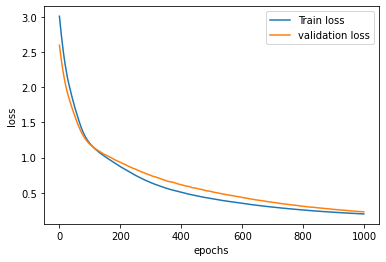

In [257]:
# loss 비교
plt.plot(his.epoch, his.history['loss'],label='Train loss')
plt.plot(his.epoch, his.history['val_loss'],label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

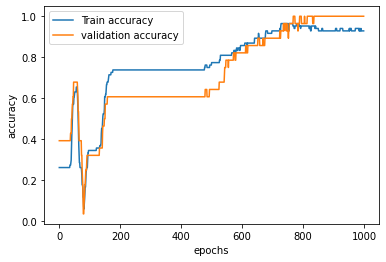

In [258]:
# accuracy
plt.plot(his.epoch, his.history['accuracy'],label='Train accuracy')
plt.plot(his.epoch, his.history['val_accuracy'],label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# 저장



In [259]:
M_FILE ='irismodel.h5'
W_FILE ='irisweight.h5'

In [260]:
from tensorflow.keras.models import save_model

In [264]:
if accv >= 0.9:
  save_model(irisModel, M_FILE)
  irisModel.save_weights(W_FILE)

# [6] 복원
---
- 모델 또는 가중치 복원
- load_model(모델 파일 또는 모델 파일명)
- Sequential.load_weights(가중치 파일 또는 폴더명)

###[6-1] 모델 복원

In [262]:
from tensorflow.keras.models import load_model

In [265]:
reModel = load_model(M_FILE)

In [266]:
reModel.evaluate(x_test,y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.2555 - accuracy: 0.9474


[0.2554931342601776, 0.9473684430122375]

In [267]:
reModel.summary()

Model: "irisModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 9)                 27        
                                                                 
 dense_23 (Dense)            (None, 9)                 90        
                                                                 
Total params: 117
Trainable params: 117
Non-trainable params: 0
_________________________________________________________________


# [6-2] 가중치 복원
- 모델 구조 생성
- 가중치 로딩

In [270]:
# 모델 구조 구성
newModel = Sequential(name = 'newIrisModel')
newModel.add(Dense(9, activation = 'relu',input_shape = (2,)))
newModel.add(Dense(9, activation = 'softmax'))
newModel.summary()

Model: "newIrisModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 9)                 27        
                                                                 
 dense_25 (Dense)            (None, 9)                 90        
                                                                 
Total params: 117
Trainable params: 117
Non-trainable params: 0
_________________________________________________________________


In [283]:
# 모델 생성
newModel.compile(loss = 'sparse_categorical_crossentropy',
                 optimizer = 'adam',
                 metrics = 'accuracy')

In [284]:
# 가중치 로딩
newModel.load_weights(W_FILE)

In [285]:
newModel.evaluate(x_test,y_test)

2/2 [==============================] - 0s 12ms/step - loss: 0.2555 - accuracy: 0.9474


[0.2554931342601776, 0.9473684430122375]

In [286]:
newModel.summary()

Model: "newIrisModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 9)                 27        
                                                                 
 dense_25 (Dense)            (None, 9)                 90        
                                                                 
Total params: 117
Trainable params: 117
Non-trainable params: 0
_________________________________________________________________
